## Task 1: Prediction using Supervised ML


## Name = Shaikh Sadi

## what is linear regression and why we are using it in this Problem
Linear regression is a statistical method for modelling relationship between a dependent variable with a given set of independent variables. We can call these dependent variables as response and independent variable as features for simplicity.
In this problem, we will be dealing with only two variables (that is 'hours studied by student' and 'marks scored by student'
It is an example of simple linear regression as it only involves two variables (one feature and one response).



# Loading the data

In [5]:
# importing essential libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


In [6]:
# Reading data from dataset
student_data = pd.read_csv('dataset/student_scores.csv')

In [7]:
# shape of data
student_data.shape

(25, 2)

In [8]:
# Description of data
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


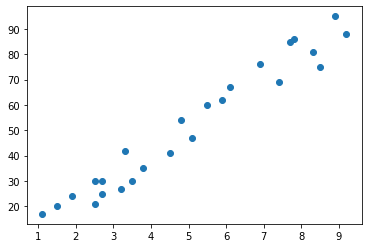

In [9]:
# plot the data
plt.scatter(x = student_data['Hours'], y = student_data['Scores'])

# Preparing data
In this step we will divide the data into features('input') and label('output')

In [10]:
# converting columns into arrays
student_hours = student_data.iloc[:, :-1].values
student_marks = student_data.iloc[:, 1].values

In [11]:
# split the data into train and test set using sklearn builtin train_test_split() method 
from sklearn.model_selection import train_test_split
student_hours_train, student_hours_test, student_marks_train, student_marks_test = train_test_split(student_hours,
student_marks,test_size=0.2,random_state=0)

# Training the model

In [12]:
# applying linear Regression model (traing the model)
regressor = LinearRegression()
regressor.fit(student_hours_train, student_marks_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

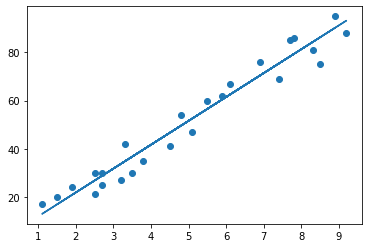

In [15]:
#Plot the regression line
line = regressor.coef_*student_hours+regressor.intercept_

# Plot for the test data
plt.scatter(student_hours, student_marks)
plt.plot(student_hours, line);
plt.show()

# Make predictions 

In [16]:
# predicting scores using linear regression
scores_prediction = regressor.predict(student_hours_test)

In [17]:
# The coefficients
print('Coefficients: %.3f'% regressor.coef_)

# The intercept
print('intercept: %.3f'% regressor.intercept_)

Coefficients: 9.911
intercept: 2.018


In [18]:
# comparing the actual and predicted values
output_df = pd.DataFrame({'Actual': student_marks_test, 'Predicted': scores_prediction})
print(output_df)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


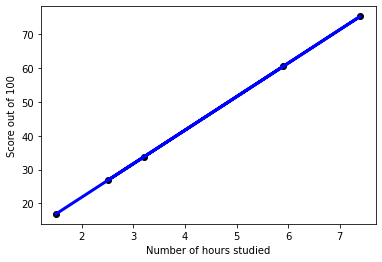

In [21]:
# Plot outputs
plt.scatter(student_hours_test, scores_prediction,  color='black')
plt.plot(student_hours_test, scores_prediction, color='blue', linewidth=3)


## labeling axis
plt.xlabel('Number of hours studied')
plt.ylabel('Score out of 100')

plt.show()


In [22]:
# score prediction when hours of study is 9.5 hours
hours = 9.5
print('No of Hours = %.2f'% hours)
print('predicted score of student if he studies for 9.5 hours is = %.2f'% (regressor.predict([[9.5]])))

No of Hours = 9.50
predicted score of student if he studies for 9.5 hours is = 96.17


## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many other metrics.

In [25]:
# The mean squared error
print('Mean squared error: %.3f'% metrics.mean_squared_error(student_marks_test, scores_prediction))

# The Mean absolute error
print('Mean Absolute Error:%.3f'% metrics.mean_absolute_error(student_marks_test, scores_prediction))

# The coefficient of determination: (1 is perfect prediction)
print('Coefficient of determination: %.3f'% metrics.r2_score(student_marks_test, scores_prediction))

print('Root Mean Squared Error:%.3f'% np.sqrt(metrics.mean_squared_error(student_marks_test, scores_prediction)))

Mean squared error: 21.599
Mean Absolute Error:4.184
Coefficient of determination: 0.945
Root Mean Squared Error:4.647


In [26]:
if np.sqrt(metrics.mean_squared_error(student_marks_test, scores_prediction)) < 0.1*student_data.Scores.mean():
    print('The Root mean squared error is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job')

The Root mean squared error is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job
